In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Importing Libraries

In [ ]:
#general utility libraries
import pandas as pd
import numpy as np


#for reading MATLAB file
from scipy.io import loadmat

#for visualization
import matplotlib.pyplot as plt

#keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
from keras.utils import np_utils

#Importing Dataset

In [ ]:
X_train = loadmat('/content/drive/MyDrive/MNIST data/mnist_training_data.mat')['training_data']
Y_train = loadmat('/content/drive/MyDrive/MNIST data/mnist_training_label.mat')['training_label']


X_test = loadmat('/content/drive/MyDrive/MNIST data/mnist_test_data.mat')['test_data']
Y_test = loadmat('/content/drive/MyDrive/MNIST data/mnist_test_label.mat')['test_label']

#GPU Configuration

In [ ]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
print(f"No. of GPUs available: {len(physical_devices)}")
if physical_devices:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)

No. of GPUs available: 1


#Inspecting the Dataset before Pre-processing

In [ ]:
#Shape of training data
X_train.shape

(50000, 784)

In [ ]:
#Shape of test data
X_test.shape

(10000, 784)

In [ ]:
#Preparing dataset for visualization
index = np.random.permutation(len(X_train))

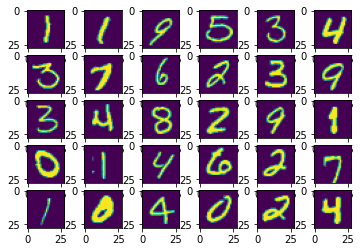

In [ ]:
#Primary visualization of dataset
j = 1
for i in index[:30]:
  plt.subplot(5,6,j)
  j+=1
  plt.imshow(X_train[i].reshape(28,28))

#Preprocessing the Data 

In [ ]:
#Reshaping the input vector into 28x28 pixels 
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [ ]:
image_height = X_train.shape[1]  
image_width = X_train.shape[2]
num_channels = 1  # AS we have grayscale images
# Here image_height = image_width = 28

In [ ]:
# One-hot encoding using keras' numpy-related utilities
num_classes = 10
print("Shape before one-hot encoding: ", Y_train.shape)
Y_train = np_utils.to_categorical(Y_train, num_classes)
Y_test = np_utils.to_categorical(Y_test, num_classes)
print("Shape after one-hot encoding: ", Y_train.shape)

Shape before one-hot encoding:  (50000, 1)
Shape after one-hot encoding:  (50000, 10)


In [ ]:
# Shuffling the training dataset (5 times)
for _ in range(5): 
    idx = np.random.permutation(len(X_train))

X_train = X_train[idx]
Y_train = Y_train[idx]

# Setting aside 20% of the train_data/labels as the validation sets
val_perc = 0.20
val_count = int(val_perc * len(X_train))

# First pick validation set from train_data/labels
X_val = X_train[:val_count,:]
Y_val = Y_train[:val_count,:]

# leaving rest in training set
X1_train = X_train[val_count:,:]
Y1_train = Y_train[val_count:,:]

# Now We will train on new train data/train labels and validate on val data/val labels


#Building CNN Model

In [ ]:
def build_model():
    model = Sequential()
    # adding Convolutional layers
    model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same',
                     input_shape=(image_height, image_width, num_channels)))
    model.add(MaxPool2D(pool_size=(2,2)))
    model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'))
    model.add(MaxPool2D(pool_size=(2,2)))
    model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'))
    model.add(MaxPool2D(pool_size=(2,2)))    
    model.add(Flatten())
    # Densely connected layers
    model.add(Dense(128, activation='relu'))
    # output layer
    model.add(Dense(num_classes, activation='softmax'))
    # compiling the sequential model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

model = build_model()
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 64)          36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 576)               0

#Training Model

In [ ]:
no_epochs = 100
results = model.fit(X1_train,Y1_train,epochs= no_epochs,batch_size = 64, validation_data= (X_val,Y_val))

Epoch 1/100
625/625 [==============================] - 3s 4ms/step - loss: 0.0156 - accuracy: 0.9945 - val_loss: 0.0775 - val_accuracy: 0.9817
Epoch 2/100
625/625 [==============================] - 3s 4ms/step - loss: 0.0135 - accuracy: 0.9954 - val_loss: 0.0767 - val_accuracy: 0.9840
Epoch 3/100
625/625 [==============================] - 3s 5ms/step - loss: 0.0120 - accuracy: 0.9958 - val_loss: 0.0906 - val_accuracy: 0.9818
Epoch 4/100
625/625 [==============================] - 3s 5ms/step - loss: 0.0122 - accuracy: 0.9954 - val_loss: 0.0792 - val_accuracy: 0.9814
Epoch 5/100
625/625 [==============================] - 3s 4ms/step - loss: 0.0103 - accuracy: 0.9964 - val_loss: 0.0890 - val_accuracy: 0.9824
Epoch 6/100
625/625 [==============================] - 3s 5ms/step - loss: 0.0101 - accuracy: 0.9962 - val_loss: 0.0865 - val_accuracy: 0.9803
Epoch 7/100
625/625 [==============================] - 3s 4ms/step - loss: 0.0094 - accuracy: 0.9969 - val_loss: 0.0902 - val_accuracy: 0.9822

#Accuracy & Loss Plot

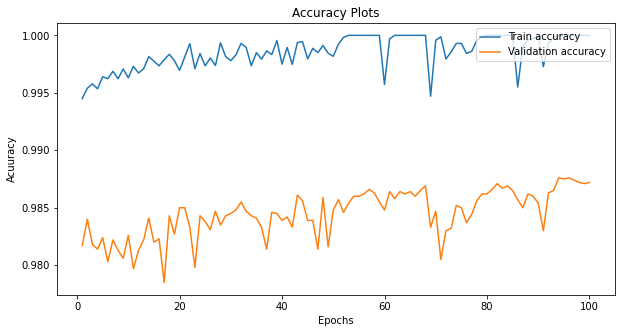

In [ ]:
#accuracy plots of valiation & train set vs epochs
fig=plt.figure(figsize=(10, 5))
plt.plot(np.arange(1, no_epochs+1), results.history['accuracy'], label="Train accuracy")
plt.plot(np.arange(1, no_epochs+1), results.history['val_accuracy'], label="Validation accuracy")
plt.xlabel('Epochs')
plt.ylabel('Acuuracy')
plt.title("Accuracy Plots")
plt.legend(loc='upper right')
plt.show()

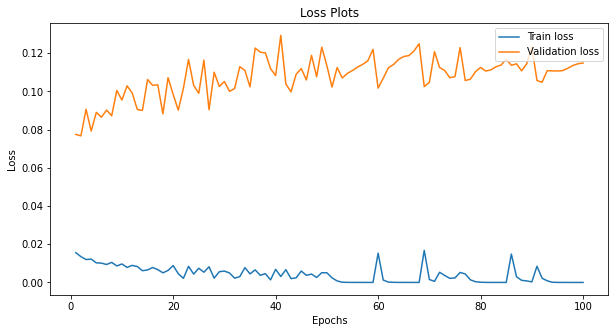

In [ ]:
#Loss plots of validation & train set vs epochs
fig=plt.figure(figsize=(10, 5))
plt.plot(np.arange(1, no_epochs+1), results.history['loss'], label="Train loss")
plt.plot(np.arange(1, no_epochs+1), results.history['val_loss'], label="Validation loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title("Loss Plots")
plt.legend(loc='upper right')
plt.show()

#Testing the Data Based on the Trained Model

In [ ]:
test_loss, test_accuracy = \
  model.evaluate(X_test, Y_test, batch_size=64)
print('Test loss: %.4f accuracy: %.4f' % (test_loss, test_accuracy))

157/157 [==============================] - 0s 3ms/step - loss: 0.0686 - accuracy: 0.9897
Test loss: 0.0686 accuracy: 0.9897


#Checking accuracy for First 100 Predictions

In [ ]:
predictions = model.predict(X_test)
first100_preds = np.argmax(predictions, axis=1)[:100]
first100_true = np.argmax(Y_test,axis=1)[:100]
print(first100_preds)
print(first100_true)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


Although we have achieved an accuraccy of 98.9% on our test data and got 100% accuracy on our first 100 predictions from the accuracy & loss plot it is  evident that our model is underfitting the training data as validation loss is quiet high compared to training loss.This indicates that the model is capable of further learning and possible further improvements.So,we have to search the generalized model for our dataset.






So we resort to hyperparameter tuning using keras-tuner.So, the 1 st question is what is hyperparameter?
Hyperparameters are those which need to be set before launching the learning process. The learning rate or the number of units in a dense layer are hyperparameters.
And how does keras-tuner work?
Steps:
1. Define a tuner is defined.
2. The tuner library search function performs the iteration loop, which evaluates a certain number of hyperparameter combinations.
3. Evaluate the performance by computing the trained model’s accuracy on a held-out validation set.
4. The best hyperparameter combination in terms of validation accuracy can be tested on a held-out test set.

#Installing Necessary Libraries

In [ ]:
pip install keras-tuner

     |████████████████████████████████| 96 kB 4.4 MB/s 
  Created wheel for kt-legacy: filename=kt_legacy-1.0.3-py3-none-any.whl size=9568 sha256=bd8799b97a4dd5f92d65e5ce028f090627faac3b672bf7ac80083a8971007f60
  Stored in directory: /root/.cache/pip/wheels/38/5c/e0/13003e68c17f403af40b92a24d20171b95fef13b0fdaba833c
Successfully built kt-legacy


In [ ]:
pip install loguru

     |████████████████████████████████| 57 kB 4.3 MB/s 


In [ ]:
import time
from loguru import logger

In [ ]:
from keras_tuner import HyperModel,RandomSearch,Hyperband

#Setting Parameters

In [ ]:
SEED = 1

NUM_CLASSES = 10
INPUT_SHAPE = (image_height,image_width,num_channels)

N_EPOCH_SEARCH = 10
MAX_TRIALS = 20
EXECUTION_PER_TRIAL = 2

#Keras Tuner Hypermodel

In [ ]:

class HyperModel(HyperModel):
    def __init__(self, input_shape, num_classes):
        self.input_shape = input_shape
        self.num_classes = num_classes

    def build(self, hp):
        model = Sequential()
        model.add(
            Conv2D(
                filters = hp.Int('Con_1_filter',min_value = 32,max_value = 128, step = 16),
                kernel_size= hp.Choice('Conv_1_kernel', values = [3,5]),
                activation='relu',
                input_shape=self.input_shape
            )
        )
        model.add(
            Conv2D(
                filters = hp.Int('Conv_2_filter',min_value = 32,max_value = 64, step = 16),
                kernel_size = hp.Choice('Conv_2_kernel', values = [3,5]),
                activation='relu'
            )
        )
        model.add(MaxPool2D(pool_size=2))
        model.add(
            Dropout(rate=hp.Float(
                'dropout_1',
                min_value=0.0,
                max_value=0.5,
                default=0.25,
                step=0.05,
            ))
        )
        model.add(
            Conv2D(
                filters=hp.Int('Conv_3_filter',min_value = 32,max_value = 64, step = 16),
                kernel_size=hp.Choice('Conv_3_kernel', values = [3,5]),
                activation='relu'
            )
        )
        model.add(
            Conv2D(
                filters=hp.Int(
                    'Conv_4_filter',
                    min_value = 32,
                    max_value = 64,
                    step = 16,
                ),
                activation='relu',
                kernel_size=hp.Choice('Conv_4_kernel', values = [3,5])
            )
        )
        model.add(MaxPool2D(pool_size=2))
        model.add(
            Dropout(rate=hp.Float(
                'dropout_2',
                min_value=0.0,
                max_value=0.5,
                default=0.25,
                step=0.05,
            ))
        )
        model.add(Flatten())
        model.add(
            Dense(
                units=hp.Int(
                    'dense_1_units',
                    min_value=32,
                    max_value=512,
                    step=32,
                    default=128
                ),
                activation=hp.Choice(
                    'dense_activation',
                    values=['relu','tanh','sigmoid'],
                    default='relu'
                )
            )
        )
        model.add(
            Dropout(
                rate=hp.Float(
                    'dropout_3',
                    min_value=0.0,
                    max_value=0.5,
                    default=0.25,
                    step=0.05
                )
            )
        )
        model.add(Dense(self.num_classes, activation='softmax'))

        model.compile(
            optimizer=keras.optimizers.Adam(
                hp.Float(
                    'learning_rate',
                    min_value=1e-4,
                    max_value=1e-2,
                    sampling='LOG',
                    default=1e-3
                )
            ),
            loss='categorical_crossentropy',
            metrics=['accuracy']
        )
        return model

hypermodel = HyperModel(input_shape=INPUT_SHAPE, num_classes=NUM_CLASSES)

#Hyperparameter tuning method: Random Search

In [ ]:
random_tuner = RandomSearch(
    hypermodel,
    objective="val_accuracy",
    seed=SEED,
    max_trials=MAX_TRIALS,
    executions_per_trial=EXECUTION_PER_TRIAL,
    directory = 'random_search',
    project_name = 'MNIST'
    )

#Hyperparameter Tuning

In [ ]:
random_tuner.search_space_summary()

Search space summary
Default search space size: 14
Con_1_filter (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 128, 'step': 16, 'sampling': None}
Conv_1_kernel (Choice)
{'default': 3, 'conditions': [], 'values': [3, 5], 'ordered': True}
Conv_2_filter (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 64, 'step': 16, 'sampling': None}
Conv_2_kernel (Choice)
{'default': 3, 'conditions': [], 'values': [3, 5], 'ordered': True}
dropout_1 (Float)
{'default': 0.25, 'conditions': [], 'min_value': 0.0, 'max_value': 0.5, 'step': 0.05, 'sampling': None}
Conv_3_filter (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 64, 'step': 16, 'sampling': None}
Conv_3_kernel (Choice)
{'default': 3, 'conditions': [], 'values': [3, 5], 'ordered': True}
Conv_4_filter (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 64, 'step': 16, 'sampling': None}
Conv_4_kernel (Choice)
{'default': 3, 'conditions': [], 'values': [3, 5], 

In [ ]:
#finding best hyperparameter
logger.info("Start training")
search_start = time.time()
random_tuner.search(X_train, Y_train, epochs=N_EPOCH_SEARCH, validation_data = (X_val,Y_val))
search_end = time.time()
elapsed_time = search_end - search_start
logger.info(f"Elapsed time (s): {elapsed_time}")

Trial 20 Complete [00h 02m 28s]
val_accuracy: 0.9893999993801117

Best val_accuracy So Far: 0.9907999932765961
Total elapsed time: 01h 09m 18s
INFO:tensorflow:Oracle triggered exit


2021-07-22 12:04:53.338 | INFO     | __main__:<module>:7 - Elapsed time (s): 4158.764880657196


In [ ]:
# Show a summary of the search
random_tuner.results_summary()

Results summary
Results in random_search/MNIST
Showing 10 best trials
Objective(name='val_accuracy', direction='max')
Trial summary
Hyperparameters:
Con_1_filter: 48
Conv_1_kernel: 3
Conv_2_filter: 32
Conv_2_kernel: 5
dropout_1: 0.05
Conv_3_filter: 32
Conv_3_kernel: 3
Conv_4_filter: 48
Conv_4_kernel: 5
dropout_2: 0.25
dense_1_units: 384
dense_activation: tanh
dropout_3: 0.1
learning_rate: 0.0005161743428272905
Score: 0.9907999932765961
Trial summary
Hyperparameters:
Con_1_filter: 48
Conv_1_kernel: 5
Conv_2_filter: 32
Conv_2_kernel: 3
dropout_1: 0.25
Conv_3_filter: 64
Conv_3_kernel: 3
Conv_4_filter: 32
Conv_4_kernel: 3
dropout_2: 0.2
dense_1_units: 480
dense_activation: tanh
dropout_3: 0.2
learning_rate: 0.0004160740903870983
Score: 0.9893999993801117
Trial summary
Hyperparameters:
Con_1_filter: 80
Conv_1_kernel: 5
Conv_2_filter: 64
Conv_2_kernel: 5
dropout_1: 0.45
Conv_3_filter: 32
Conv_3_kernel: 3
Conv_4_filter: 48
Conv_4_kernel: 3
dropout_2: 0.4
dense_1_units: 384
dense_activation: t

In [ ]:
best_model = random_tuner.get_best_models(num_models=1)[0]

In [ ]:
# Evaluate the best model.
loss, accuracy = best_model.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0301 - accuracy: 0.9916


In [ ]:
best_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
module_wrapper (ModuleWrappe (None, 26, 26, 48)        480       
_________________________________________________________________
module_wrapper_1 (ModuleWrap (None, 22, 22, 32)        38432     
_________________________________________________________________
module_wrapper_2 (ModuleWrap (None, 11, 11, 32)        0         
_________________________________________________________________
module_wrapper_3 (ModuleWrap (None, 11, 11, 32)        0         
_________________________________________________________________
module_wrapper_4 (ModuleWrap (None, 9, 9, 32)          9248      
_________________________________________________________________
module_wrapper_5 (ModuleWrap (None, 5, 5, 48)          38448     
_________________________________________________________________
module_wrapper_6 (ModuleWrap (None, 2, 2, 48)          0

#Building a CNN with the best result in Random Search

In [ ]:
def create_Model():
    model = Sequential()
    model.add(Conv2D(filters = 48 ,kernel_size = (3,3), activation='relu',input_shape= INPUT_SHAPE ))
    model.add(Conv2D(filters = 32, kernel_size = (5,5), activation='relu'))
    model.add(MaxPool2D(pool_size=2))
    model.add(Dropout(rate = 0.05))
    model.add(Conv2D(filters = 32, kernel_size = (3,3), activation='relu'))
    model.add(Conv2D(filters = 48, kernel_size = (5,5), activation='relu'))
    model.add(MaxPool2D(pool_size=2))
    model.add(Dropout(rate = 0.25 ))
    model.add(Flatten())
    model.add(Dense(units = 384 ,activation= 'tanh'))
    model.add(Dropout(rate = 0.1))
    model.add(Dense(10, activation='softmax'))
    model.compile(
            optimizer=keras.optimizers.Adam(learning_rate= 0.0005161743428272905),
            loss='categorical_crossentropy',
            metrics=['accuracy']
            )
    return model

Final_model = create_Model()

#Evaluating the new CNN Model

In [ ]:
#evaluationg the model without the weights of random search
n_epochs = 100
NEW = Final_model.fit(X1_train,Y1_train,epochs= n_epochs,validation_data=(X_val,Y_val))

Epoch 1/100
1250/1250 [==============================] - 7s 5ms/step - loss: 0.6656 - accuracy: 0.7781 - val_loss: 0.2068 - val_accuracy: 0.9352
Epoch 2/100
1250/1250 [==============================] - 6s 4ms/step - loss: 0.2220 - accuracy: 0.9301 - val_loss: 0.1223 - val_accuracy: 0.9633
Epoch 3/100
1250/1250 [==============================] - 6s 4ms/step - loss: 0.1582 - accuracy: 0.9502 - val_loss: 0.0954 - val_accuracy: 0.9718
Epoch 4/100
1250/1250 [==============================] - 6s 4ms/step - loss: 0.1324 - accuracy: 0.9586 - val_loss: 0.0777 - val_accuracy: 0.9771
Epoch 5/100
1250/1250 [==============================] - 6s 4ms/step - loss: 0.1126 - accuracy: 0.9658 - val_loss: 0.0806 - val_accuracy: 0.9775
Epoch 6/100
1250/1250 [==============================] - 7s 5ms/step - loss: 0.1024 - accuracy: 0.9679 - val_loss: 0.0675 - val_accuracy: 0.9801
Epoch 7/100
1250/1250 [==============================] - 7s 5ms/step - loss: 0.0907 - accuracy: 0.9716 - val_loss: 0.0643 - val_ac

#Accuracy & Lost Plot

In [ ]:
def plot_training_history(training_history, title='Training History'):
    train_loss = training_history.history['loss']
    valid_loss = training_history.history['val_loss']
    train_acc = training_history.history['accuracy']
    valid_acc = training_history.history['val_accuracy']

    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.suptitle(title)
    fig.set_size_inches(15, 5)

    ax1.plot(train_loss, label='Training Loss')
    ax1.plot(valid_loss, label='Validation Loss')
    ax1.set_title('Loss')
    ax1.legend()

    ax2.plot(train_acc, label='Training Accuracy')
    ax2.plot(valid_acc, label='Validation Accuracy')
    ax2.set_title('Accuracy')
    ax2.legend()

    fig.show()


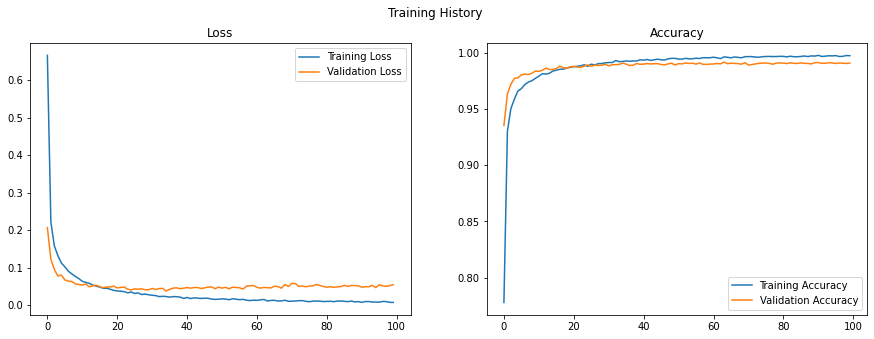

In [ ]:
plot_training_history(NEW)

Here two sets of accuracy and validation graphs are plotted after training the best model from random search,without keeping the weights obtained from tuning .As we can see from the graph, the 2nd model has performed better compared to the one without random search as training and validation accuracy increased to a point of stability with a minimal gap between the two final accuracy values.

#Testing & predicting on freshly created CNN

In [ ]:
test_loss, test_accuracy = \
  Final_model.evaluate(X_test, Y_test, batch_size=64)
print('Test loss: %.4f accuracy: %.4f' % (test_loss, test_accuracy))

157/157 [==============================] - 1s 3ms/step - loss: 0.0445 - accuracy: 0.9909
Test loss: 0.0445 accuracy: 0.9909


In [ ]:
predictions = Final_model.predict(X_test)

Actual Label : [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Predicted Label : 0


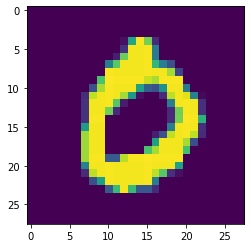

In [ ]:
plt.imshow(X_test[0].reshape(28,28))
print('Actual Label :' ,Y_test[0])
print('Predicted Label :' ,np.argmax(predictions[0]))

Actual Label : [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
Predicted Label : 9


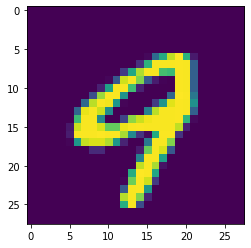

In [ ]:
plt.imshow(X_test[9999].reshape(28,28))
print('Actual Label :' ,Y_test[9999])
print('Predicted Label :' ,np.argmax(predictions[9999]))

In [ ]:
#checking accuracy of first 100 predictions
first20_preds = np.argmax(predictions, axis=1)[:100]
first20_true = np.argmax(Y_test,axis=1)[:100]
print(first20_preds)
print(first20_true)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


So we have achieved 99.09% accuracy on our test data and pretty good fitting of train and validation curves which indicate that our model has generalised well.
We also got 100% accuracy on our first 100 predictions.

#No of Mismatches

In [ ]:
(np.argmax(predictions, axis=1) != \
                        np.argmax(Y_test,axis=1)).sum()

91

We got 91/10000 incorrect predictions which is pretty good.